# Praktikum / Live-Coding

## NLP: TF-IDF, n-grams und sentiment analysis

In [55]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Ziel: Sentiment Analysis von Filmkritiken

Wir wollen für kurze Filmkritiken in Textform vorhersagen ob diese positiv oder negativ sind.

### Daten: IMDB movie review dataset

Wir arbeiten zu diesem Zweck mit dem *IMDB movie review dataset*. Darin befinden sich 40 000 Kritiken von der Seite *IMDB* die als negativ (<= 4/10) oder positiv (>= 7/10) gelabeld wurden.

### Quellen:
Die Daten befinden sich auf Moodle (`movie_reviews_train.csv`) und stammen von Kaggle [Link zum Datensatz](https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format?datasetId=429163&sortBy=voteCount).

Ursprünglich kommen die Daten aber hierher: https://ai.stanford.edu/~amaas/data/sentiment/

## Importieren und erstes Erkunden
- Fehlen Einträge?
- Gibt es offensichtlich merkwürdige Einträge?
- Sind die möglichen Label (positiv/negativ) gut verteilt?

In [56]:
filename = "./Datasets/movie_reviews_train.csv"  # Pfad entsprechend anpassen

data = pd.read_csv(filename)
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [57]:
data.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [59]:
data.label.value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

## Find your own way...

`Scikit-Learn` hat (wie so oft) einige nützliche Funktionen für uns, auch im Bereich NLP. Hier soll es um das Berechnen von tf-idf Werten gehen und dafür gibt es den `TfidfVectorizer`.

Siehe die Dokumentation hier: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidf#sklearn.feature_extraction.text.TfidfVectorizer

- Was machen `min_df` und `max_df` ?
- Versuche den "Korpus" (data.text) mit dem `TfidfVectorizer` in ein Array aus Feature-Vektoren umzuwandeln (siehe Dokumentation), z.B. mit `min_df=2, max_df = 0.5`.
- Wie viele Features bekommen wir?
- Schaue dir die Feature-Namen an mit `.get_feature_names()`

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Float und Integer haben unterschiedliche Bedeutung
#   Float: Anteil an 
tfidf = TfidfVectorizer(min_df=5, max_df=0.25)
tfidf_vectors = tfidf.fit_transform(data.text)

In [61]:
tfidf_vectors

<40000x33566 sparse matrix of type '<class 'numpy.float64'>'
	with 3891589 stored elements in Compressed Sparse Row format>

In [62]:
tfidf_vectors.shape

(40000, 33566)

In [63]:
tfidf_vectors[0, :].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [64]:
tfidf_vectors[0, :].data

array([0.12007904, 0.12042906, 0.07418654, 0.33102796, 0.13791151,
       0.16815772, 0.13079507, 0.10742894, 0.05563762, 0.08690508,
       0.0946926 , 0.09587586, 0.0971014 , 0.06824807, 0.11425899,
       0.06368947, 0.06686298, 0.10646246, 0.08324413, 0.07165219,
       0.0485321 , 0.15939687, 0.08396701, 0.06506924, 0.10654096,
       0.14173851, 0.06106236, 0.12602378, 0.06190385, 0.04726035,
       0.08759477, 0.07800459, 0.15489722, 0.10017393, 0.06683188,
       0.10055811, 0.07328062, 0.05861072, 0.09223574, 0.04197834,
       0.10554756, 0.07886   , 0.12703292, 0.056314  , 0.06182246,
       0.08853218, 0.13742837, 0.07317911, 0.06789736, 0.1056967 ,
       0.0888377 , 0.07093686, 0.07183838, 0.07889135, 0.07283397,
       0.08076296, 0.05281058, 0.12703292, 0.09856895, 0.09070081,
       0.1502964 , 0.13785561, 0.04259281, 0.11973602, 0.06155201,
       0.05037236, 0.05952437, 0.0844378 , 0.0604038 , 0.20332149,
       0.11842869, 0.42708669, 0.09296863, 0.04943741, 0.12783

In [65]:

# Negative Zahlen für Array: Die letzten X Einträge auswählen
tfidf.get_feature_names_out()[-100:]

array(['zack', 'zadora', 'zahn', 'zandt', 'zane', 'zaniness', 'zanuck',
       'zany', 'zap', 'zappa', 'zapped', 'zara', 'zardoz', 'zarkov',
       'zasu', 'zatoichi', 'zeal', 'zealand', 'zealander', 'zealot',
       'zealots', 'zealous', 'zebra', 'zed', 'zeffirelli', 'zeitgeist',
       'zeke', 'zelah', 'zelda', 'zellweger', 'zellwegger', 'zeman',
       'zemeckis', 'zen', 'zena', 'zenith', 'zentropa', 'zephyr',
       'zeppelin', 'zero', 'zeroes', 'zest', 'zesty', 'zeta', 'zeus',
       'zhang', 'zhao', 'zhivago', 'zhou', 'zhu', 'zhuravli', 'ziering',
       'ziggy', 'zilch', 'zillion', 'zillions', 'zimbalist', 'zimmer',
       'zing', 'zingers', 'zip', 'zipper', 'zippo', 'zippy', 'zis',
       'ziyi', 'zizek', 'zodiac', 'zoe', 'zoey', 'zola', 'zombi',
       'zombie', 'zombies', 'zombification', 'zombified', 'zomcom',
       'zone', 'zoned', 'zones', 'zoo', 'zoolander', 'zoom', 'zoomed',
       'zooming', 'zooms', 'zoot', 'zorro', 'zosch', 'zu', 'zucco',
       'zucker', 'zula', 'zu

In [66]:
tfidf.get_feature_names_out()[:100]

array(['00', '000', '007', '00pm', '00s', '01', '02', '03', '04', '05',
       '06', '07', '08', '09', '10', '100', '1000', '100s', '100th',
       '101', '102', '103', '104', '105', '107', '108', '109', '10s',
       '10th', '11', '110', '111', '112', '115', '116', '117', '11th',
       '12', '120', '1200', '123', '125', '12th', '13', '130', '134',
       '135', '13th', '14', '140', '14th', '15', '150', '1500', '15th',
       '16', '160', '1600', '163', '16mm', '16s', '16th', '17', '170',
       '1700', '175', '17th', '18', '180', '1800', '1800s', '1830',
       '1840', '1846', '1850', '1850s', '1860', '1861', '1865', '1870s',
       '1876', '1888', '1890', '1890s', '1891', '1892', '1895', '1898',
       '18th', '19', '1900', '1900s', '1901', '1902', '1904', '1905',
       '1906', '1909', '1910', '1911'], dtype=object)

# Machine Learning --> Sentiment Analysis

Um die Labels (1/0 also positiv/negativ) vorherzusagen soll ein *logistic regression* Modell trainiert und getestet werden!

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(tfidf_vectors, data.label)

LogisticRegression(random_state=0)

## Modell testen
Um das trainierte Modell zu testen nehmen wir einen (dem Modell noch unbekannten) Datensatz: `movie_reviews_test.csv`.

- Sage die Label für die Test-Daten vorher
- Messe die Genauigkeit mit `from sklearn.metrics import accuracy_score`
- Erstelle eine Konfusionsmatrix (`from sklearn.metrics import confusion_matrix`)

In [84]:
filename = "./Datasets/movie_reviews_test.csv"  # Pfad entsprechend anpassen

data_test = pd.read_csv(filename)
data_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [85]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [79]:
data_test.describe()

,label
count,5000.000000
mean,0.501000
std,0.500049
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [92]:
tfidf_vectors_test = tfidf.transform(data_test.text)
predictions = model.predict(tfidf_vectors_test)

In [103]:
# Beispiel einer einzelnen Vorhersage

vector1 = tfidf.transform(['I really hate this horrbile movie!'])
model.predict(vector1)

array([1])

In [105]:
predictions[:100]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [106]:
data_test.label.values[:100]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(data_test.label, predictions)

0.897

In [110]:
confusion_matrix(data_test.label, predictions, labels=[0, 1])

array([[2204,  291],
       [ 224, 2281]])

<Axes: >

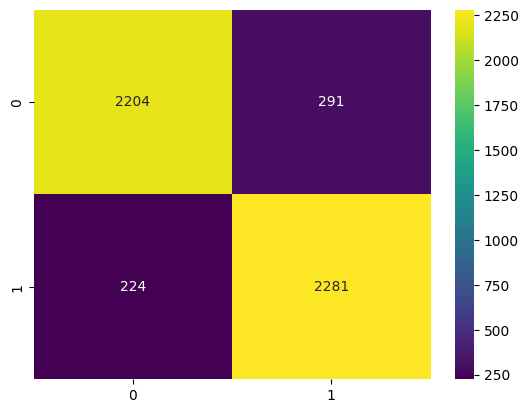

In [126]:
import seaborn as sb

sb.heatmap(confusion_matrix(data_test.label, predictions),
           annot=True, cmap="viridis", fmt="1")

## Modell interpretieren

Einer der Vorteile von *logistic regression* ist, dass wir uns anschauen können was das Modell wirklich "gelernt" hat. Dazu können wir die gelernten Koeffizienten ausgeben mit `model.coef_`

- Welche Wörter sind am wichtigsten für eine negative oder positive Bewertung (je die Top-10 anzeigen)

In [112]:
model.coef_.shape, tfidf_vectors.shape

((1, 33566), (40000, 33566))

In [113]:
# Wörter mit Werten nahe 0 werden fast nicht beachtet
# Wörter mit höheren Werten werden stärker gewichtet

model.coef_[0, :20]

array([-0.26203402, -0.53808198, -0.05226202, -0.15275128,  0.09787024,
       -0.01314556, -0.05020105,  0.08768128, -0.02458163,  0.02998026,
       -0.16422829, -0.13902857, -0.43225906,  0.11611976,  1.83183226,
        0.18068938, -0.24864996, -0.02610343, -0.26238361,  0.08303376])

In [115]:
ngrams = pd.DataFrame({"word": tfidf.get_feature_names_out(),
                       "weight": model.coef_[0]

})

ngrams.head()

,word,weight
0,00,-0.262034
1,000,-0.538082
2,007,-0.052262
3,00pm,-0.152751
4,00s,0.097870


In [119]:
ngrams.sort_values("weight")

,word,weight
33189,worst,-11.186820
2394,bad,-8.171654
2297,awful,-8.155204
32550,waste,-8.154929
3667,boring,-6.718864
...,...,...
21971,perfect,5.246521
1238,amazing,5.387926
33103,wonderful,5.777629
3050,best,6.098168


In [123]:
ngrams.sort_values("weight").head(20)

,word,weight
33189,worst,-11.186820
2394,bad,-8.171654
2297,awful,-8.155204
32550,waste,-8.154929
3667,boring,-6.718864
22703,poor,-6.400021
29890,terrible,-6.276207
20544,nothing,-5.851620
14388,horrible,-5.352134
9314,dull,-5.319214


In [124]:
# ngrams.sort_values("weight", ascending=False).head(20)

ngrams.sort_values("weight").tail(20)

,word,weight
28567,still,3.557178
16194,job,3.629455
10031,enjoyable,3.769305
30323,today,4.041955
14074,hilarious,4.048213
17837,love,4.091413
10912,fantastic,4.152700
29112,superb,4.215836
7789,definitely,4.240130
14054,highly,4.384209


# Vergleich: 2-grams, 3-grams...

Bisher haben wir nur mit 1-grams gearbeitet (also einzelnen Wörtern). Wir können aber auch die Häufigkeiten der 2-grams etc. zählen und hinzunehmen. Dazu einfach den Parameter `ngram_range` auf z.B. `(1, 2)` (1-grams und 2-grams).

Da es dadurch deutlich mehr Terme gibt, sollten dann aber auch min_df und max_df angepasst werden, z.B `min_df=6` oder 10...

- Gibt das eine bessere Vorhersage der Labels?